In [13]:
# Import libraries and load dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (adjust path if local or GitHub raw link)
df = pd.read_csv("software_engineers_employment_dataset_cleaned.csv")

# Preview
df.head()

# Map gender
df["SEX"] = df["SEX"].map({1: "Male", 2: "Female"})

In [5]:
#  Summary statistics by gender (no education split)
gender_summary = df.groupby("SEX")["weekly_earnings"].agg(
    ["mean", "median", "std", "count"]
)
gender_summary

,mean,median,std,count
SEX,,,,
Female,2201.928791,1923.08,1557.635744,5568
Male,2700.468700,2307.69,2011.810593,22394


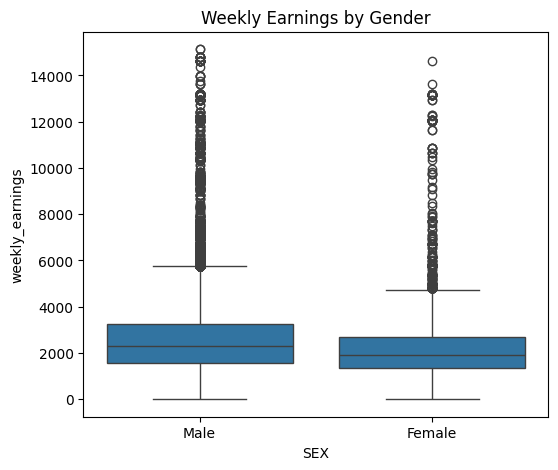

In [ ]:
# Boxplot of wages by gender

plt.figure(figsize=(6, 5))
sns.boxplot(x="SEX", y="weekly_earnings", data=df)
plt.title("Weekly Earnings by Gender")
plt.show()

## Gender Wage Differences (Boxplot Interpretation)

### Observations
1. **Central Tendency (Median)**  
   - Median weekly earnings for **men** are higher than for **women**.  
   - The box for men is shifted upward compared to women, indicating a gender pay gap in central earnings.

2. **Spread and Distribution**  
   - Both genders have a wide earnings range, but **men show more high-value outliers**.  
   - The interquartile ranges (boxes) are similar, meaning overall variability is comparable, but the top end is higher for men.

3. **Outliers**  
   - Both groups have extreme high earners, yet there is a **higher concentration of very high wage outliers among men**.

4. **Visual Gender Gap**  
   - The visual difference aligns with the statistical test (**T-statistic = 20.08, p-value < 0.0001**), confirming that the gender wage gap is statistically significant.

### Conclusion
- Men, on average, earn more weekly than women in this dataset.  
- The higher concentration of extreme male earners suggests that differences exist not just in average wages but also in top-end earnings distribution.


In [10]:
from scipy import stats

male_wages = df.loc[df["SEX"] == "Male", "weekly_earnings"]
female_wages = df.loc[df["SEX"] == "Female", "weekly_earnings"]

t_stat, p_val = stats.ttest_ind(
    male_wages, female_wages, equal_var=False
)  # Welch's t-test
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: 20.08, p-value: 0.0000


## Gender Wage Difference (No Education Control)

- **T-statistic = 20.08, p-value < 0.0001** → The difference in weekly earnings between men and women is statistically significant.
- Men, on average, earn **significantly more** than women in this dataset.
- This result does **not control for education, race, age, or other factors**; it reflects the raw observed gender gap.


In [14]:
import statsmodels.formula.api as smf

model_gender_only = smf.ols("weekly_earnings ~ C(SEX)", data=df).fit()
print(model_gender_only.summary())

                            OLS Regression Results                            
Dep. Variable:        weekly_earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     297.6
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.47e-66
Time:                        18:07:37   Log-Likelihood:            -2.5121e+05
No. Observations:               27962   AIC:                         5.024e+05
Df Residuals:                   27960   BIC:                         5.024e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2201.9288     25.864     85.

## Gender Wage Gap (No Education Control)

### Key Findings
- **Men earn on average $499 more per week than women** (**p < 0.001**).  
- This represents roughly **23% higher earnings** for men compared to women.  
- Gender alone explains only **~1% of the variation** in weekly earnings (**R² = 0.011**), suggesting that other factors (education, experience, location, industry) also influence wages.

### Conclusion
- There is a **statistically significant gender pay gap** in this dataset, even when not controlling for education or other variables.
